In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("../data/original/train-metadata.csv")
isic_ids = df_train["isic_id"].unique()

/var/folders/vh/wys9_ffj5fzbpb21d4rvh5wr0000gn/T/ipykernel_31024/3104746672.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../data/original/train-metadata.csv")


In [3]:
pd.read_parquet("../data/outputs/lgb_plain/preds.parquet").describe()

,pred
count,401059.000000
mean,0.000795
std,0.008284
min,0.000002
25%,0.000104
50%,0.000218
75%,0.000575
max,0.925913


In [4]:
dict_pred_path = {
    #"lgb_plain" :"../data/outputs/lgb_plain/preds.parquet",
    #"lgb_no_att": "../data/outputs/lgb_no_att/preds.parquet",
    "image_convnext_nes": "../data/outputs/image_convnext_nes/preds.parquet",
    "image_eva_nes": "../data/outputs/image_eva_nes/preds.parquet",
    "sub_71": "../data/sub_71/preds.parquet",
    "sub_73": "../data/sub_73/preds.parquet",
    "sub_75": "../data/sub_75/preds.parquet",
    "sub_77": "../data/sub_77/preds.parquet",
    
}
df_pred = pd.DataFrame()
for k, v in dict_pred_path.items():
    df = pd.read_parquet(v)
    df = df[df["isic_id"].isin(isic_ids)]
    preds = df.sort_values("isic_id").reset_index(drop=True)["pred"].rank(method="average")
    df_pred[k] = preds / preds.max()
    # df_pred[k] = pd.read_parquet(v).sort_values("isic_id").reset_index(drop=True)["pred"]

In [5]:
df_pred.corr(method="spearman").style.background_gradient()

,image_convnext_nes,image_eva_nes,sub_71,sub_73,sub_75,sub_77
image_convnext_nes,1.000000,0.751160,0.610909,0.497468,0.606251,0.481525
image_eva_nes,0.751160,1.000000,0.591300,0.477790,0.593968,0.478233
sub_71,0.610909,0.591300,1.000000,0.777044,0.864761,0.756127
sub_73,0.497468,0.477790,0.777044,1.000000,0.741920,0.760446
sub_75,0.606251,0.593968,0.864761,0.741920,1.000000,0.729829
sub_77,0.481525,0.478233,0.756127,0.760446,0.729829,1.000000


In [6]:
pd.read_parquet("../data/sub_71/preds.parquet")

,isic_id,pred
0,ISIC_0015845,0.001004
1,ISIC_0015902,0.000001
2,ISIC_0024200,0.000006
3,ISIC_0051665,0.000025
4,ISIC_0051812,0.000003
...,...,...
96302,ISIC_0000026,0.021781
96303,ISIC_0000021,0.021045
96304,ISIC_0000011,0.032161
96305,ISIC_0000010,0.010945


In [7]:
dict_pred_path = {
    #"lgb_plain" :"../data/outputs/lgb_plain/preds.parquet",
    "lgb" :"../data/outputs/lgb/preds.parquet",
    "with_att": "../data/kanna/with_att.parquet",
    "with_attout": "../data/kanna/without_att.parquet",
    "pred_lgb_98": "../data/fyk/pred_lgb_exp98.parquet",
    "pred_xgb_98": "../data/fyk/pred_xgb_exp98.parquet",
    "pred_lgb_122": "../data/fyk/pred_lgb_exp122.parquet",
    "pred_xgb_122": "../data/fyk/pred_xgb_exp122.parquet",
}
df_pred = pd.DataFrame()
for k, v in dict_pred_path.items():
    df_pred[k] = pd.read_parquet(v).sort_values("isic_id").reset_index(drop=True)["pred"]

In [8]:
df_pred.corr(method="spearman").style.background_gradient()

,lgb,with_att,with_attout,pred_lgb_98,pred_xgb_98,pred_lgb_122,pred_xgb_122
lgb,1.000000,0.369966,0.397936,0.401865,0.350349,0.481533,0.443553
with_att,0.369966,1.000000,0.983634,0.779620,0.808616,0.715564,0.739806
with_attout,0.397936,0.983634,1.000000,0.786419,0.805841,0.721359,0.738081
pred_lgb_98,0.401865,0.779620,0.786419,1.000000,0.889190,0.892369,0.806135
pred_xgb_98,0.350349,0.808616,0.805841,0.889190,1.000000,0.826310,0.861828
pred_lgb_122,0.481533,0.715564,0.721359,0.892369,0.826310,1.000000,0.896382
pred_xgb_122,0.443553,0.739806,0.738081,0.806135,0.861828,0.896382,1.000000


In [9]:
dict_pred_path = {
    "image_convnext_nes": "../data/outputs/image_convnext_nes/preds.parquet",
    "sub_71": "../data/sub_71/preds.parquet",
}

df_pred = df_train[["isic_id"]].sort_values("isic_id")
for k, v in dict_pred_path.items():
    df = pd.read_parquet(v)
    df = df[df["isic_id"].isin(isic_ids)]
    preds = df.sort_values("isic_id").reset_index(drop=True)["pred"].rank(method="average")
    df_pred[k] = preds / preds.max()

In [10]:
df_pred

,isic_id,image_convnext_nes,sub_71
0,ISIC_0015670,0.501410,0.423835
1,ISIC_0015845,0.803904,0.972439
2,ISIC_0015864,0.378418,0.405210
3,ISIC_0015902,0.391037,0.268234
4,ISIC_0024200,0.850773,0.564161
...,...,...,...
401054,ISIC_9999937,0.923517,0.930110
401055,ISIC_9999951,0.653580,0.288143
401056,ISIC_9999960,0.037301,0.730571
401057,ISIC_9999964,0.486265,0.494183


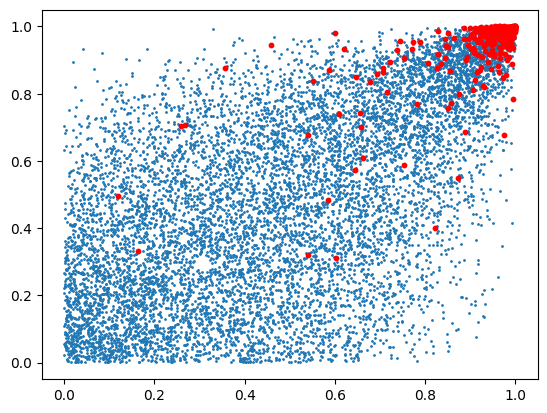

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plt.subplots()
df_pos = df_pred[df_pred["isic_id"].isin(df_train[df_train["target"]==1]["isic_id"].unique())]
df_sampled = df_pred.sample(10000)
ax.scatter(df_sampled["image_convnext_nes"].values, df_sampled["sub_71"].values, s=1)
ax.scatter(df_pos["image_convnext_nes"].values, df_pos["sub_71"].values, s=10, c="red")